In [12]:
# LINK GOOGLE DRIVE"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
# Imports
import numpy as np
import pandas as pd
from tqdm import tqdm  
import random
! pip install sgp4
from sgp4.api import Satrec
from sgp4.api import jday
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('/content/drive/MyDrive/CS685_project/data/yaogan9A_delta_data.csv') 
df.drop([df.columns[0]], axis=1)

,d_sma,d_ecc,d_inc,d_argument_perigee,d_raan,d_mean_anomaly,d_r_x,d_r_y,d_r_z,d_norm_r,d_v_x,d_v_y,d_v_z,d_norm_v
0,-1360.960007,0.000149,-0.0041,-0.0873,-0.2680,103.4782,9406.791201,-2594.483668,6490.680962,4.030861,6.796605,4.495405,-8.060549,-0.011150
1,189.584316,-0.000095,-0.0014,0.5636,-0.1941,5.4043,726.415927,138.884292,-197.122085,4.395218,-0.230929,0.287757,-0.651185,0.000129
2,121.159329,-0.000108,0.0018,-1.8543,-0.2044,31.8137,3108.835080,1155.615505,-1949.398619,7.837816,-2.204853,1.238195,-2.783189,-0.000085
3,122.508072,-0.000024,0.0016,4.5833,-0.3081,-143.9428,-13249.433322,1429.815868,-4350.277330,-0.781455,-4.422312,-6.025621,11.495083,0.011418
4,-32.155477,0.000044,0.0071,0.1985,-0.1861,-0.1868,-0.926316,23.378482,1.696246,-1.086298,-0.008972,0.000215,0.000658,0.000283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9106,0.007402,0.000006,-0.0001,0.0017,-1.6870,-69.2917,230.163795,-6398.928721,5468.115570,10.239673,4.797595,4.475958,4.726402,0.246992
9107,-0.029609,0.000003,0.0000,0.0012,-0.8035,70.2438,22.490132,6277.857451,-5574.384172,275.461495,-4.753417,-4.471081,-4.739836,-0.248539
9108,-0.037012,0.000003,0.0000,0.0018,-0.9008,-106.8423,-2343.469816,-10497.790072,5192.241303,-164.284692,6.694743,3.208352,8.919470,0.421497
9109,0.092528,0.000003,0.0000,0.0014,-0.7825,30.8565,2043.091147,3377.976126,503.179633,-18.695549,-1.294235,1.143783,-3.541242,-0.144940


In [30]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df.drop([normalized_df.columns[0]], axis=1, inplace=True)
normalized_df.head()

,d_sma,d_ecc,d_inc,d_argument_perigee,d_raan,d_mean_anomaly,d_r_x,d_r_y,d_r_z,d_norm_r,d_v_x,d_v_y,d_v_z,d_norm_v
0,0.000000,0.634491,0.271739,0.499922,0.066781,0.643727,0.822033,0.412255,0.956805,0.502378,0.894100,0.784321,0.186991,0.487472
1,1.000000,0.378896,0.418478,0.500826,0.066973,0.507503,0.526126,0.505249,0.476531,0.503017,0.476835,0.522874,0.472698,0.497852
2,0.955870,0.365928,0.592391,0.497467,0.066946,0.544186,0.607341,0.539840,0.350694,0.509048,0.359631,0.581931,0.390487,0.497655
3,0.956740,0.453880,0.581522,0.506409,0.066677,0.300061,0.049701,0.549169,0.178279,0.493948,0.227968,0.130585,0.941060,0.508242
4,0.856992,0.524681,0.880435,0.500319,0.066994,0.499737,0.501331,0.501320,0.490809,0.493414,0.490014,0.505007,0.497833,0.497994


In [34]:
d_sma_list = list(normalized_df.iloc[:]['d_sma'])
d_ecc_list = list(normalized_df.iloc[:]['d_ecc'])
d_inc_list = list(normalized_df.iloc[:]['d_sma'])
d_argument_list = list(normalized_df.iloc[:]['d_sma'])
d_raan_list = list(normalized_df.iloc[:]['d_sma'])
d_mean_list = list(normalized_df.iloc[:]['d_sma'])
d_r_x_list = list(normalized_df.iloc[:]['d_sma'])
d_r_y_list = list(normalized_df.iloc[:]['d_sma'])
d_r_z_list = list(normalized_df.iloc[:]['d_sma'])
d_r_list = list(normalized_df.iloc[:]['d_sma'])
d_v_x_list = list(normalized_df.iloc[:]['d_sma'])


time_series = np.arange(len(d_sma_list))

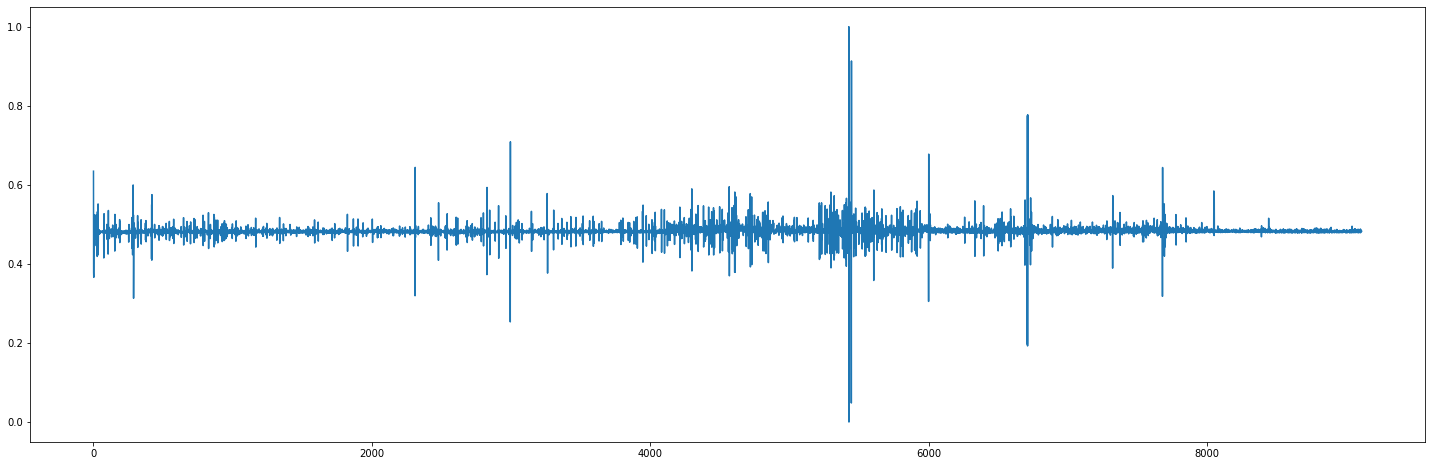

In [35]:
plt.rcParams["figure.figsize"] = (25,8)

plt.plot(time_series, d_ecc_list)
plt.show()

In [37]:
import pywt
from skimage.restoration import denoise_wavelet

x_denoise = denoise_wavelet(np.array(d_ecc_list), method='BayesShrink', mode='soft', wavelet_levels=3, wavelet='sym8', rescale_sigma='True')

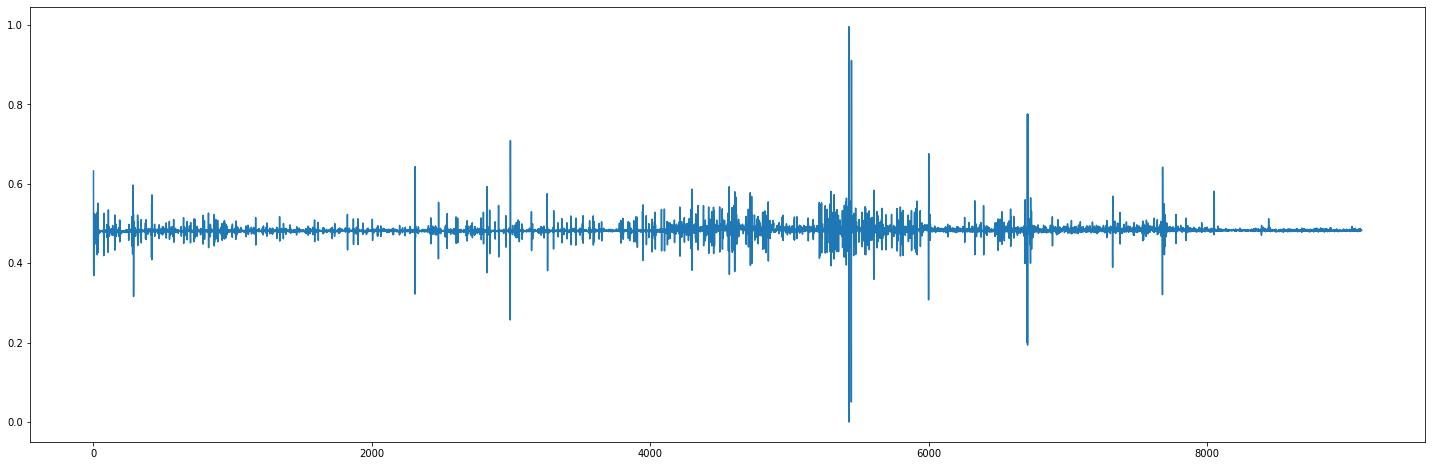

In [38]:
plt.rcParams["figure.figsize"] = (25,8)

plt.plot(time_series, x_denoise)
plt.show()

In [40]:
print(d_ecc_list)
print(list(x_denoise))

[0.6344906923237809, 0.3788956285295966, 0.36592763020288666, 0.4538799414348463, 0.5246810290734153, 0.44959213553649874, 0.47866555113992876, 0.46371052081154557, 0.48661367914662207, 0.5130725789583767, 0.4626647144948755, 0.4801296799832669, 0.47333193892491093, 0.47814264798159384, 0.495607613469985, 0.4810709056682701, 0.4716586488182389, 0.4720769713449067, 0.47113574565990374, 0.5240535452834133, 0.44582723279648606, 0.488391549884961, 0.46758000418322526, 0.49843129052499463, 0.4746914871365822, 0.474691487136582, 0.48117548629993717, 0.4188454298263964, 0.5318970926584393, 0.47866555113992876, 0.4810709056682701, 0.4826396151432753, 0.4757372934532523, 0.5516628320435052, 0.4228194938297427, 0.473122777661577, 0.48002509935160004, 0.47960677682493175, 0.48033884124660103, 0.48128006693160424, 0.4865090985149548, 0.4808617444049362, 0.47490064839991614, 0.480966325036603, 0.4759464547165864, 0.48211671198494016, 0.47845638987659483, 0.4807571637732691, 0.47992051871993296, 0.4